# Tutorial to View Spectra

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/notebooks


In [5]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [6]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.dispersers import *
from spectractor.extractor.spectrum import *

# Configuration

In [7]:
parameters.VERBOSE = True
parameters.DEBUG = True

In [8]:
#thedate="20190214"
thedate="20190215"

In [9]:
#output_directory="../output_test/"+thedate
output_directory = "/Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/" + thedate

In [10]:
parameters.VERBOSE=True 
parameters.DISPLAY=True

# Input Files for Spectra

## Get list of files

In [11]:
onlyfiles = [f for f in listdir(output_directory) if isfile(join(output_directory, f))]

In [12]:
onlyfiles=np.array(onlyfiles)

## Sort files

In [13]:
sortedindexes=np.argsort(onlyfiles)

In [14]:
onlyfiles=onlyfiles[sortedindexes]

In [15]:
onlyfiles

array(['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrogram.fits',
       'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrum.fits',
       'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_table.csv',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrogram.fits',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrum.fits',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_table.csv',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrogram.fits',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrum.fits',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_table.csv',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrogram.fits',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrum.fits',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_table.csv',
       'T1M_20190215

## Extract \_spectrum.fits file

In [16]:
onlyfilesspectrum=[]
for f in onlyfiles:
    if re.search("^T.*_spectrum.fits$",f):
        onlyfilesspectrum.append(re.findall("(^T.*_spectrum.fits$)",f)[0])

In [17]:
onlyfilesspectrum=np.array(onlyfilesspectrum)
sortedindexes=np.argsort(onlyfilesspectrum)
onlyfilesspectrum=onlyfilesspectrum[sortedindexes]

In [18]:
onlyfilesspectrum

array(['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrum.fits',
       'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrum.fits',
       'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrum.fits',
       'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrum.fits',
       'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_spectrum.fits',
       'T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red_spectrum.fits',
       'T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red_spectrum.fits',
       'T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red_spectrum.fits',
       'T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_spectrum.fits',
       'T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_spectrum.fits'],
      dtype='<U72')

### Extract basename of files

In [19]:
onlyfilesbasename=[]
for f in onlyfilesspectrum:
    onlyfilesbasename.append(re.findall("(^T.*)_spectrum.fits$",f)[0])

In [20]:
onlyfilesbasename

['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red',
 'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red',
 'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red',
 'T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red',
 'T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red',
 'T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red',
 'T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red',
 'T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red',
 'T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red']

In [21]:
basenamecut=[]
for f in onlyfilesspectrum:
    basenamecut.append(f.split("_HD")[0])

In [22]:
basenamecut

['T1M_20190215_225550_730',
 'T1M_20190215_225626_007',
 'T1M_20190215_225701_284',
 'T1M_20190215_225736_562',
 'T1M_20190215_225811_838',
 'T1M_20190215_225847_115',
 'T1M_20190215_225922_399',
 'T1M_20190215_225957_677',
 'T1M_20190215_230032_956',
 'T1M_20190215_230108_233']

# Plot Spectra

In [23]:
NBSPEC=len(sortedindexes)

2019-06-14 11:39:34  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      RA_PREC ... SP_TYPE SP_QUAL SP_BIBCODE
             "h:m:s"       "d:m:s"            ...                           
--------- ------------- ------------- ------- ... ------- ------- ----------
HD 116405 13 22 45.1237 +44 42 53.911      14 ...     A0V       C           
2019-06-14 11:39:34  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:34  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrum.fits
2019-06-14 11:39:34  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrogram.fits
2019-06-14 11:39:34  Spectrum   load_spectrum        INFO   
	Loading 

0 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


2019-06-14 11:39:35  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_table.csv


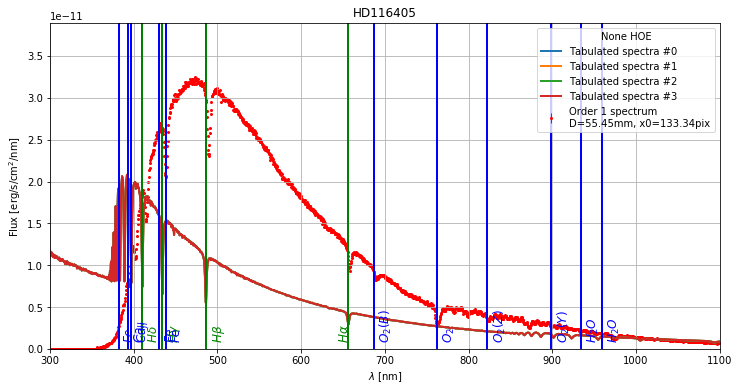

2019-06-14 11:39:35  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_2 SP_QUAL_2 SP_BIBCODE_2
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:35  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:35  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrum.fits
2019-06-14 11:39:35  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrogram.fits
2019-06-14 11:39:35  Spectrum   load_spectrum        INFO   
	Loading chromati

1 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


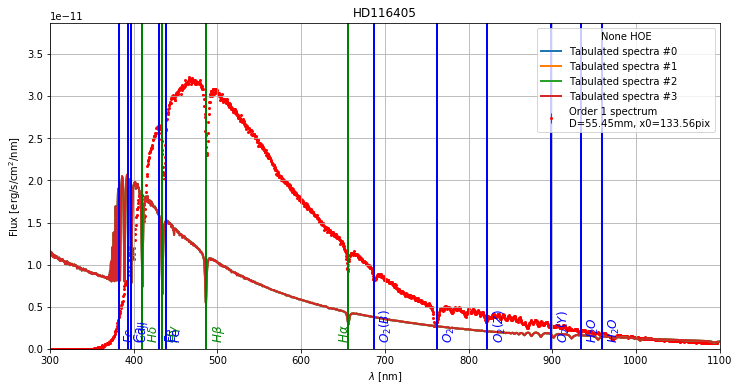

2019-06-14 11:39:36  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_3 SP_QUAL_3 SP_BIBCODE_3
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrum.fits
2019-06-14 11:39:36  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrogram.fits
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Loading chromati

2 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


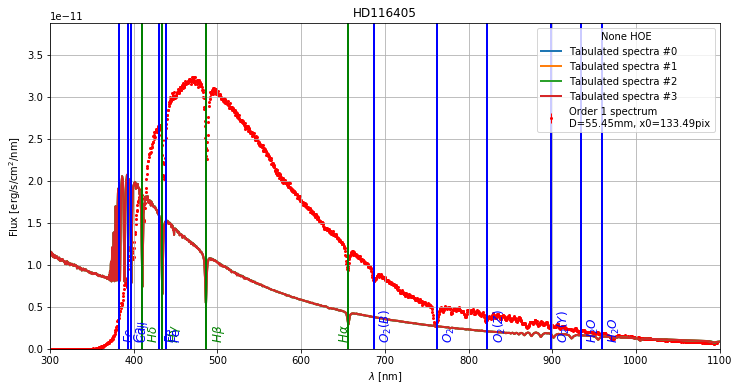

2019-06-14 11:39:36  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_4 SP_QUAL_4 SP_BIBCODE_4
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrum.fits
2019-06-14 11:39:36  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrogram.fits
2019-06-14 11:39:36  Spectrum   load_spectrum        INFO   
	Loading chromati

3 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


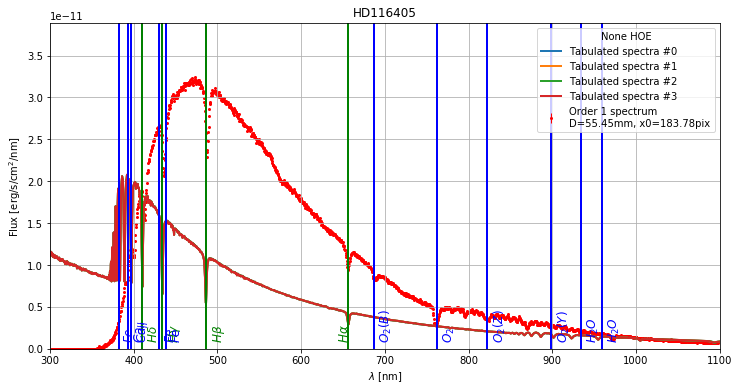

2019-06-14 11:39:37  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_5 SP_QUAL_5 SP_BIBCODE_5
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_spectrum.fits
2019-06-14 11:39:37  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_spectrogram.fits
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Loading chromati

4 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


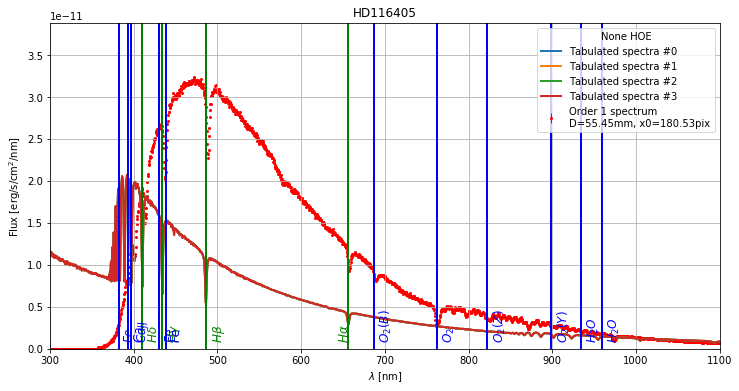

2019-06-14 11:39:37  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_6 SP_QUAL_6 SP_BIBCODE_6
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red_spectrum.fits
2019-06-14 11:39:37  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red_spectrogram.fits
2019-06-14 11:39:37  Spectrum   load_spectrum        INFO   
	Loading chromati

5 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225847_115_HD116405_Filtre_None_bin1x1.6_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


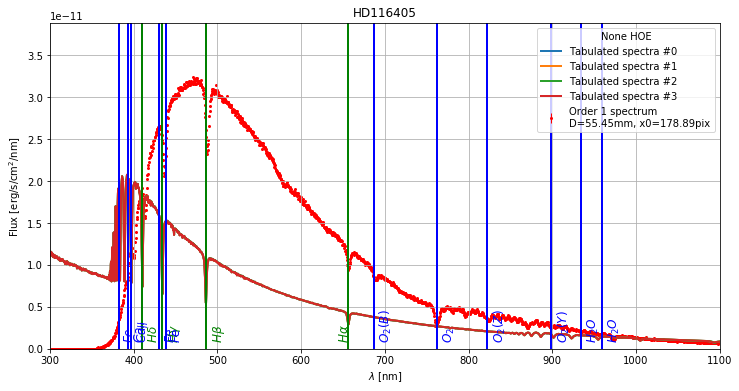

2019-06-14 11:39:38  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_7 SP_QUAL_7 SP_BIBCODE_7
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red_spectrum.fits
2019-06-14 11:39:38  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red_spectrogram.fits
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Loading chromati

6 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225922_399_HD116405_Filtre_None_bin1x1.7_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


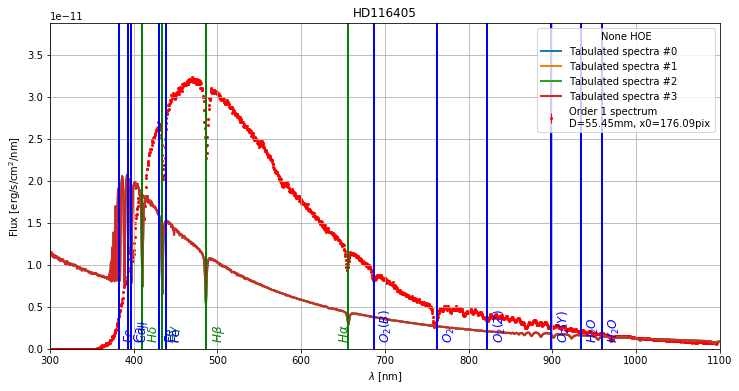

2019-06-14 11:39:38  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_8 SP_QUAL_8 SP_BIBCODE_8
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red_spectrum.fits
2019-06-14 11:39:38  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red_spectrogram.fits
2019-06-14 11:39:38  Spectrum   load_spectrum        INFO   
	Loading chromati

7 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225957_677_HD116405_Filtre_None_bin1x1.8_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


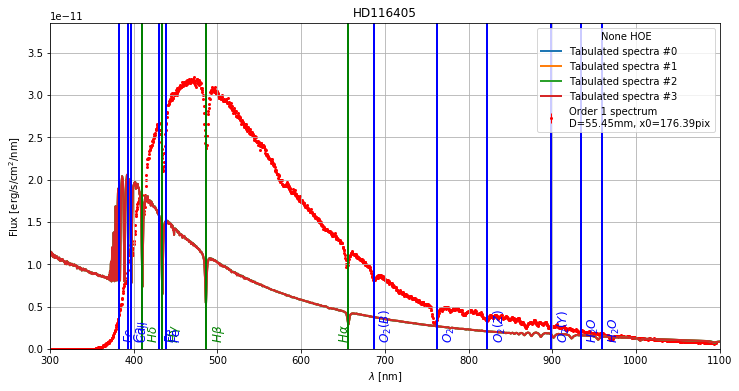

2019-06-14 11:39:39  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_9 SP_QUAL_9 SP_BIBCODE_9
             "h:m:s"       "d:m:s"    ...                                 
--------- ------------- ------------- ... --------- --------- ------------
HD 116405 13 22 45.1237 +44 42 53.911 ...       A0V         C             
2019-06-14 11:39:39  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:39  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_spectrum.fits
2019-06-14 11:39:39  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_spectrogram.fits
2019-06-14 11:39:39  Spectrum   load_spectrum        INFO   
	Loading chromati

8 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


2019-06-14 11:39:39  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230032_956_HD116405_Filtre_None_bin1x1.9_red_table.csv


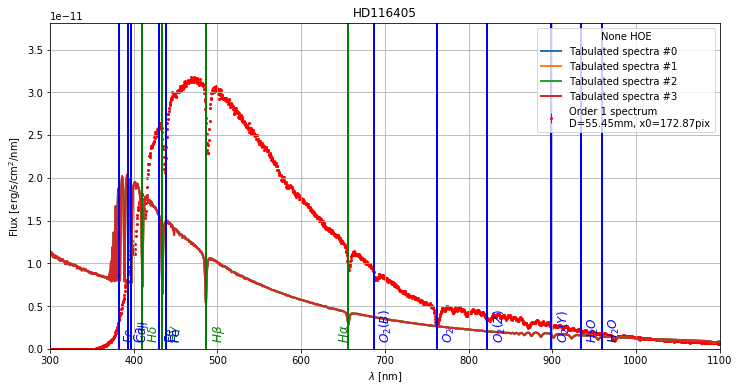

2019-06-14 11:39:39  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_10 SP_QUAL_10 SP_BIBCODE_10
             "h:m:s"       "d:m:s"    ...                                    
--------- ------------- ------------- ... ---------- ---------- -------------
HD 116405 13 22 45.1237 +44 42 53.911 ...        A0V          C              


9 , /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_spectrum.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits


2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_spectrum.fits
2019-06-14 11:39:40  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_spectrogram.fits
2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Loading chromatic psf /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_table.csv...
2019-06-14 11:39:40  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_230108_233_HD116405_Filtre_None_bin1x1.10_red_table

Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


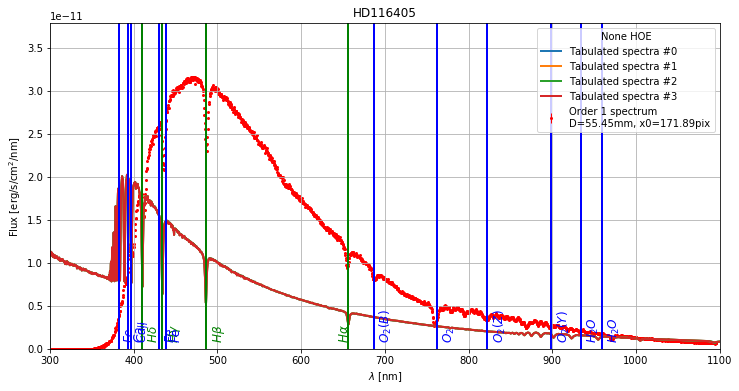

In [24]:
for idx in np.arange(0,NBSPEC):
    #if idx in [0,1,4]:
    #    continue
        
        
   
    
    fullfilename=os.path.join(output_directory,onlyfilesspectrum[idx])
    
    
    print(idx,",", fullfilename)
        
    s = Spectrum()
    s.load_spectrum(fullfilename)
    s.plot_spectrum(xlim=None,force_lines=True)

2019-06-14 11:39:40  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_TYPE_11 SP_QUAL_11 SP_BIBCODE_11
             "h:m:s"       "d:m:s"    ...                                    
--------- ------------- ------------- ... ---------- ---------- -------------
HD 116405 13 22 45.1237 +44 42 53.911 ...        A0V          C              
2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150PDM19...
2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Spectrum loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrum.fits
2019-06-14 11:39:40  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from /Users/dagoret/DATA/PicDuMidiFev2019/spectractor_output_test/20190215/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_spectrogram.fits
2019-06-14 11:39:40  Spectrum   load_spectrum        INFO   
	Load

Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150PDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor2/Spectractor/spectractor/extractor/dispersers/Holo150PDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 45.0 degrees


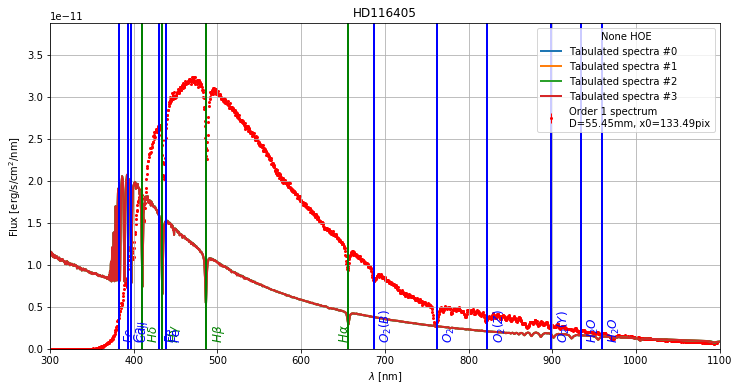

In [25]:
idx=7
fullfilename=os.path.join(output_directory,onlyfiles[idx])
s = Spectrum()
s.load_spectrum(fullfilename)
s.plot_spectrum(xlim=None,force_lines=True)